In [27]:
from pathlib import Path
import datetime as dt
import pandas as pd
import numpy as np

In [29]:
#Read the csv file into a pandas DataFrame
df_fl = pd.read_csv(Path("../../../data/processed_data/fl_cleaned_ev_stations_data.csv"))

# List of counties to keep
counties_to_keep = ['Miami-Dade County', 'Broward County', 'Hillsborough County', 'Palm Beach County', 'Orange County',]

# Create a new column 'cleaned_county' to store the cleaned county names
df_fl['cleaned_county'] = df_fl['cleaned_county'].apply(lambda x: x if x in counties_to_keep else 'Other Florida Counties')

# Group by 'year' and 'cleaned_county' and sum the 'ev_station_count' and 'cumulative_ev_stations'
cleaned_df = df_fl.groupby(['year', 'cleaned_county']).sum().reset_index()


cleaned_df

,year,cleaned_county,ev_station_count,cumulative_ev_stations
0,2011,Broward County,3,3
1,2011,Hillsborough County,5,5
2,2011,Miami-Dade County,8,8
3,2011,Orange County,4,4
4,2011,Other Florida Counties,16,16
...,...,...,...,...
78,2024,Hillsborough County,22,251
79,2024,Miami-Dade County,76,687
80,2024,Orange County,97,422
81,2024,Other Florida Counties,307,1617


In [31]:
# Drop the 'county' column

#cleaned_df.drop('cleaned_county', axis=1, inplace=True)

In [33]:
# Save the cleaned data to a new csv file
cleaned_df.to_csv('fl_cleaned_ev_stations_data_topfive.csv', index=False)

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
df_fl_topfive = pd.read_csv(Path("../../../data/processed_data/fl_cleaned_ev_stations_data_topfive.csv"))

df_fl_topfive

,year,cleaned_county,ev_station_count,cumulative_ev_stations
0,2011,Broward County,3,3
1,2011,Hillsborough County,5,5
2,2011,Miami-Dade County,8,8
3,2011,Orange County,4,4
4,2011,Other Florida Counties,16,16
...,...,...,...,...
78,2024,Hillsborough County,22,251
79,2024,Miami-Dade County,76,687
80,2024,Orange County,97,422
81,2024,Other Florida Counties,307,1617


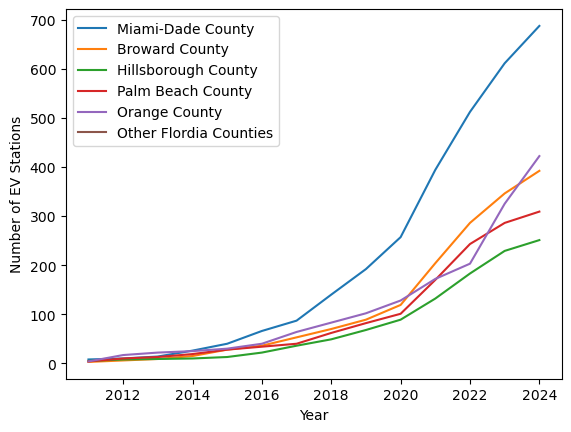

In [37]:
# Create a separate plot for each county
counties = ['Miami-Dade County', 'Broward County', 'Hillsborough County', 'Palm Beach County', 'Orange County', 'Other Flordia Counties']

fig, ax = plt.subplots()
for county in counties:
    county_data = df_fl_topfive[df_fl_topfive['cleaned_county'] == county]
    ax.plot(county_data['year'], county_data['cumulative_ev_stations'], label=county)

# Add labels and legend
ax.set_xlabel('Year')
ax.set_ylabel('Number of EV Stations')
ax.legend()

# Show the plot
plt.show()

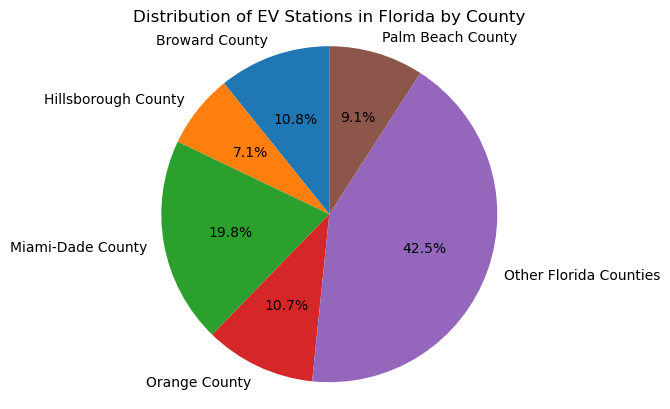

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the CSV file
df_fl_topfive = pd.read_csv(Path("../../../data/processed_data/fl_cleaned_ev_stations_data_topfive.csv"))


# Sum the 'cumulative_ev_stations' for each county
county_totals = df_fl_topfive.groupby('cleaned_county')['cumulative_ev_stations'].sum()

# Create a pie chart
fig, ax = plt.subplots()
ax.pie(county_totals, labels=county_totals.index, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Add a title
plt.title('Distribution of EV Stations in Florida by County')

# Show the pie chart
plt.show()

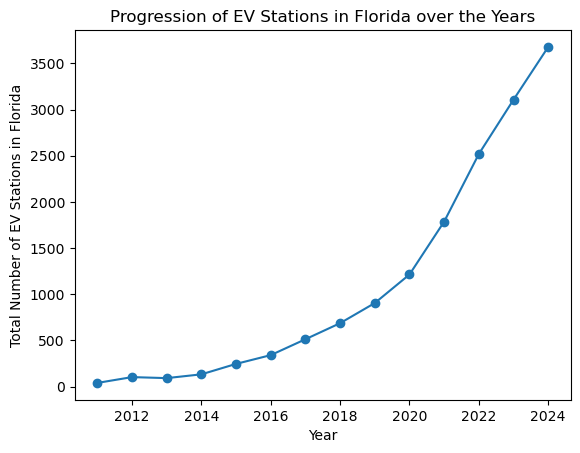

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Load the data from the CSV file
df_fl_topfive = pd.read_csv(Path("../../../data/processed_data/fl_cleaned_ev_stations_data_topfive.csv"))

# Group by 'year' and sum the 'cumulative_ev_stations' for all counties
florida_total = df_fl_topfive.groupby('year')['cumulative_ev_stations'].sum().reset_index()

# Create a progression graph for Florida total EV stations
fig, ax = plt.subplots()
ax.plot(florida_total['year'], florida_total['cumulative_ev_stations'], marker='o')

# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Total Number of EV Stations in Florida')
plt.title('Progression of EV Stations in Florida over the Years')

# Show the plot
plt.show()

In [49]:
from sklearn.linear_model import LinearRegression

# Create a new DataFrame with only the relevant columns for prediction
florida_total_subset = florida_total[florida_total['year'] >= 2010]

# Create the linear regression model
model = LinearRegression()

# Fit the model using the year as the independent variable and cumulative_ev_stations as the dependent variable
model.fit(florida_total_subset[['year']], florida_total_subset['cumulative_ev_stations'])

# Predict the number of EV stations in Florida for the year 2030
prediction_2030 = model.predict([[2030]])

print("Predicted number of EV stations in Florida by 2030:", prediction_2030[0])

Predicted number of EV stations in Florida by 2030: 4406.978021978051


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


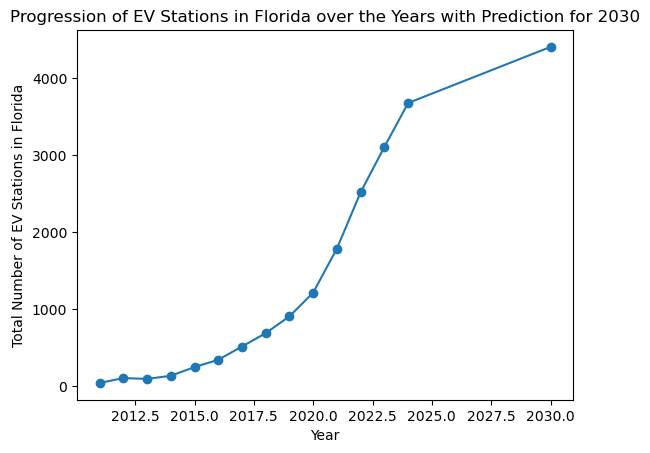

In [53]:
# Extend the years to include 2030
years = florida_total['year'].tolist() + [2030]
stations = florida_total['cumulative_ev_stations'].tolist() + [prediction_2030[0]]

# Create a progression graph for Florida total EV stations including the prediction for 2030
fig, ax = plt.subplots()
ax.plot(years, stations, marker='o')

# Add labels and title
ax.set_xlabel('Year')
ax.set_ylabel('Total Number of EV Stations in Florida')
plt.title('Progression of EV Stations in Florida over the Years with Prediction for 2030')

# Show the plot
plt.show()

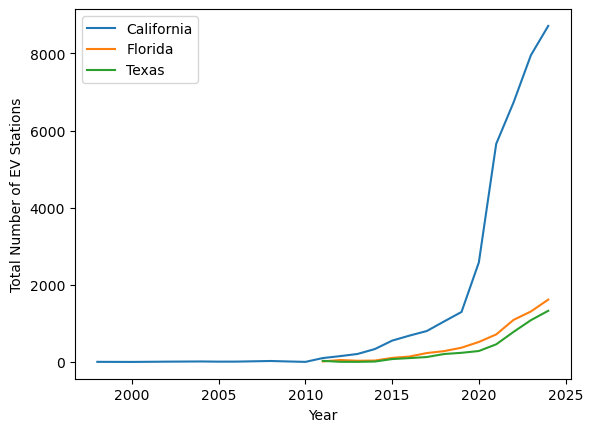

In [18]:
# Load the data from the .csv files
df_tx_topfive = pd.read_csv(Path("../../../data/processed_data/tx_cleaned_ev_stations_data_topfive.csv"))
df_fl_topfive = pd.read_csv(Path("../../../data/processed_data/fl_cleaned_ev_stations_data_topfive_2.csv"))
df_ca_topfive = pd.read_csv(Path("../../../data/processed_data/ca_cleaned_ev_stations_topfive_data.csv"))

# Merge the cleaned DataFrames for California, Florida, and Texas based on the 'year' column
combined_df = pd.concat([df_tx_topfive,df_fl_topfive,df_ca_topfive])

# Group by 'year' and sum the 'cumulative_ev_stations' for each state
progression_df = combined_df.groupby(['year', 'county']).sum().reset_index()

# Create a progression graph with years on the x-axis and total number of EVs on the y-axis
fig, ax = plt.subplots()
for state in ['California', 'Florida', 'Texas']:
    state_data = progression_df[progression_df['county'].str.contains(state)]
    ax.plot(state_data['year'], state_data['cumulative_ev_stations'], label=state)

# Add labels and legend
ax.set_xlabel('Year') 
ax.set_ylabel('Total Number of EV Stations')
ax.legend()

# Show the progression graph
plt.show()
